# Importing required packages

In [ ]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
%matplotlib inline
from scipy.stats import skew
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12,8)

# Load Data

In [ ]:
cnx = sqlite3.connect('ym_2017_2020.db')

In [ ]:
cnx1 = sqlite3.connect('ym_2018.db')

In [ ]:
cnx2 = sqlite3.connect('ym_2018_2020.db')

In [ ]:
cnx3 = sqlite3.connect('ym_2019.db')

In [ ]:
cnx4 = sqlite3.connect('ym_2020.db')

In [ ]:
cnx5 = sqlite3.connect('ym_2021.db')

In [ ]:
df_ym_2017_2020 = pd.read_sql_query('SELECT * FROM ym_2020',cnx)

In [ ]:
df_ym_2018 = pd.read_sql_query('SELECT * FROM ym_2018',cnx1)

In [ ]:
df_ym_2018_2020 = pd.read_sql_query('SELECT * FROM ym_2018_2020',cnx2)

In [ ]:
df_ym_2019 = pd.read_sql_query('SELECT * FROM ym_2019',cnx3)

In [ ]:
df_ym_2020 = pd.read_sql_query('SELECT * FROM ym_2020',cnx4)

In [ ]:
df_ym_2021 = pd.read_sql_query('SELECT * FROM ym_2021',cnx5)

In [ ]:
dfs = [df_ym_2017_2020, df_ym_2018, df_ym_2018_2020, df_ym_2019, df_ym_2020, df_ym_2021]
df_ym_2017_2021= pd.concat(dfs)

In [ ]:
df_ym_2017_2021.head()

,index,exp_imp,Year,month,ym,Country,hs2,hs4,hs6,hs9,Q1,Q2,Value,Unit1,Unit2
0,0.0,1,2020,01,202001.0,205,01,0101,010121,010121000,0,2,30000,NaN,NaN
1,1.0,1,2020,01,202001.0,601,01,0101,010121,010121000,0,9,60559,NaN,NaN
2,4.0,1,2020,01,202001.0,601,01,0101,010129,010129000,0,2,7490,NaN,NaN
3,7.0,1,2020,01,202001.0,105,01,0106,010612,010612000,0,4,26188,NaN,NaN
4,10.0,1,2020,01,202001.0,103,01,0106,010619,010619000,0,6905,24236,NaN,NaN


In [ ]:
df_cnt = pd.read_csv('country_eng.csv')

In [ ]:
df_cnt.head()

,Country,Country_name,Area
0,103,Korea,Asia
1,104,North_Korea,Asia
2,105,China,Asia
3,106,Taiwan,Asia
4,107,Mongolia,Asia


In [ ]:
main_df = pd.merge(df_cnt,df_ym_2017_2021,on = ['Country'])

In [ ]:
main_df.head()

,Country,Country_name,Area,index,exp_imp,Year,month,ym,hs2,hs4,hs6,hs9,Q1,Q2,Value,Unit1,Unit2
0,103,Korea,Asia,10.0,1,2020,01,202001.0,01,0106,010619,010619000,0,6905,24236,NaN,NaN
1,103,Korea,Asia,24.0,1,2020,01,202001.0,01,0106,010620,010620000,0,84,1182,NaN,NaN
2,103,Korea,Asia,29.0,1,2020,01,202001.0,01,0106,010690,010690000,0,90,267,NaN,NaN
3,103,Korea,Asia,289.0,1,2020,01,202001.0,03,0301,030199,030199100,0,187000,129644,NaN,NaN
4,103,Korea,Asia,290.0,1,2020,01,202001.0,03,0301,030199,030199900,0,482183,423962,NaN,NaN


In [ ]:
main_df.isnull().sum()

Country               0
Country_name          0
Area                  0
index           5600244
exp_imp               0
Year                  0
month                 0
ym              5600244
hs2                   0
hs4                   0
hs6                   0
hs9                   0
Q1                    0
Q2                    0
Value                 0
Unit1           1940903
Unit2           1940903
dtype: int64

In [ ]:
main_df.duplicated().any()

True

In [ ]:
main_df.drop_duplicates(keep=False,inplace=True)

In [ ]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9320298 entries, 3 to 9336725
Data columns (total 17 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Country       int64  
 1   Country_name  object 
 2   Area          object 
 3   index         float64
 4   exp_imp       int64  
 5   Year          int64  
 6   month         object 
 7   ym            float64
 8   hs2           object 
 9   hs4           object 
 10  hs6           object 
 11  hs9           object 
 12  Q1            int64  
 13  Q2            int64  
 14  Value         int64  
 15  Unit1         object 
 16  Unit2         object 
dtypes: float64(2), int64(6), object(9)
memory usage: 1.2+ GB


In [ ]:
main_df['hs2']= main_df['hs2'].astype(float)

In [ ]:
main_df[['hs4','hs6','hs9']]= main_df[['hs4','hs6','hs9']].apply(pd.to_numeric)

In [ ]:
main_df.dtypes

Country           int64
Country_name     object
Area             object
index           float64
exp_imp           int64
Year              int64
month            object
ym              float64
hs2             float64
hs4               int64
hs6               int64
hs9               int64
Q1                int64
Q2                int64
Value             int64
Unit1            object
Unit2            object
dtype: object

# EDA yr_2020

In [ ]:
cnx6 = sqlite3.connect('custom_2017_2020.db')

In [ ]:
df_custom_2020 = pd.read_sql_query('SELECT * FROM custom_2020',cnx6)

In [ ]:
df_yr_2020 = pd.merge(df_cnt,df_custom_2020,on = ['Country'])

In [ ]:
df_yr_2020.head()

,Country,Country_name,Area,index,exp_imp,Year,month,ym,Custom,hs2,hs4,hs6,hs9,Q1,Q2,Value
0,103,Korea,Asia,0,1,2020,01,202001,100,00,0000,000000,000000190,0,526875,1150084
1,103,Korea,Asia,1059,1,2020,01,202001,100,12,1209,120930,120930000,0,16,4462
2,103,Korea,Asia,1077,1,2020,01,202001,100,12,1209,120991,120991000,0,2041,12215
3,103,Korea,Asia,1312,1,2020,01,202001,100,15,1521,152110,152110000,0,500,1142
4,103,Korea,Asia,1712,1,2020,01,202001,100,18,1806,180690,180690000,0,540,513


### TOP 10 Trade markets in terms of values

In [ ]:
df_yr_2020.groupby('Country_name')['Value'].sum().sort_values(ascending = False)[:10]

Country_name
China                       23394830604
United_States_of_America    14564998389
Taiwan                       5613660535
Korea                        5566038982
Australia                    3795176066
Thailand                     3748033037
Germany                      3053198615
Viet_Nam                     3019852997
Hong_Kong                    2554188761
Malaysia                     2219589296
Name: Value, dtype: int64

<AxesSubplot:xlabel='Country_name'>

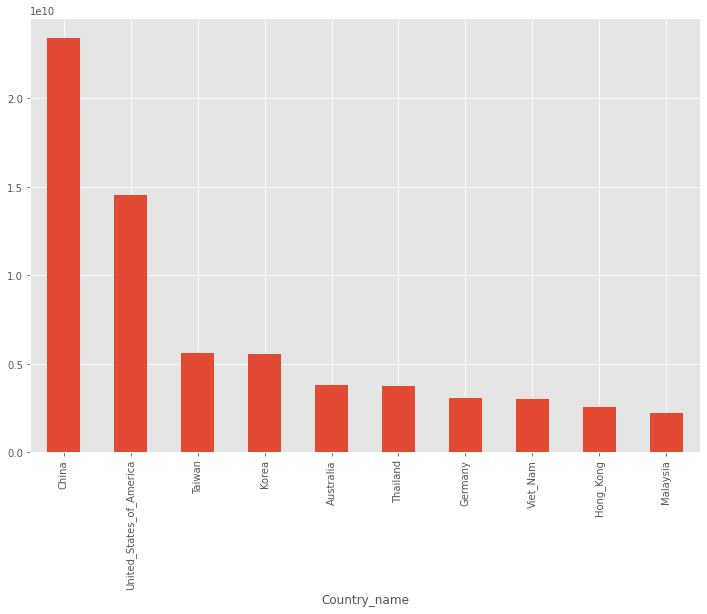

In [ ]:
df_yr_2020.groupby('Country_name')['Value'].sum().sort_values(ascending = False)[:10].sort_values(ascending = False)[:10].plot(kind = 'bar')

### Line plot of value over time (month)

<AxesSubplot:xlabel='month'>

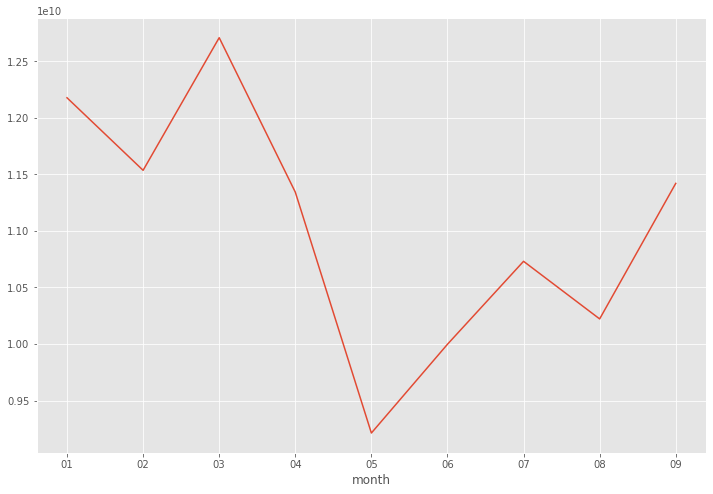

In [ ]:
df_yr_2020.groupby('month')['Value'].sum().plot.line('Year','Value')

### TOP 10 Countries Japan exports the highest in terms of values

In [ ]:
df_yr_2020[df_yr_2020['exp_imp']==1].groupby('Country_name')['Value'].sum().sort_values(ascending = False)[:10]

Country_name
China                       10709017707
United_States_of_America     8918877489
Taiwan                       3478839921
Korea                        3462530874
Hong_Kong                    2494144336
Thailand                     1909258774
Singapore                    1382317259
Germany                      1359663481
Viet_Nam                     1301644852
Malaysia                      960248497
Name: Value, dtype: int64

<AxesSubplot:xlabel='Country_name'>

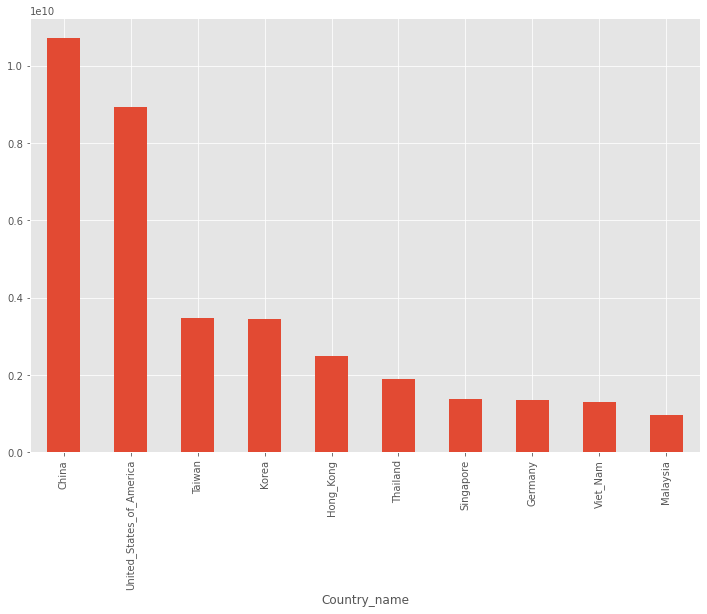

In [ ]:
df_yr_2020[df_yr_2020['exp_imp']==1].groupby('Country_name')['Value'].sum().sort_values(ascending = False)[:10].plot(kind = 'bar')

In [ ]:
df_yr_2020[df_yr_2020['exp_imp']==2].groupby('Country_name')['Value'].sum().sort_values(ascending = False)[:10]

Country_name
China                       12685812897
United_States_of_America     5646120900
Australia                    2873636513
Taiwan                       2134820614
Korea                        2103508108
Thailand                     1838774263
Viet_Nam                     1718208145
Germany                      1693535134
Saudi_Arabia                 1458000702
United_Arab_Emirates         1367626888
Name: Value, dtype: int64

### TOP 10 Countries Japan imports the highest in terms of values

<AxesSubplot:xlabel='Country_name'>

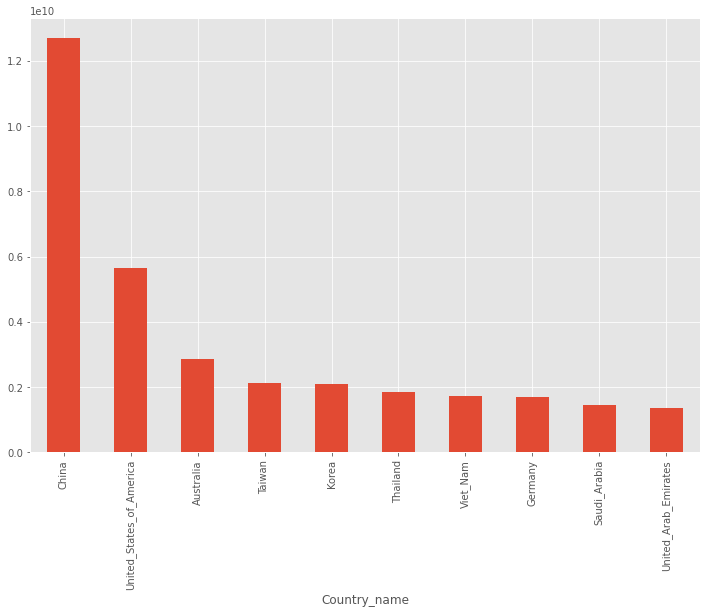

In [ ]:
df_yr_2020[df_yr_2020['exp_imp']==2].groupby('Country_name')['Value'].sum().sort_values(ascending = False)[:10].plot(kind = 'bar')

# EDA ym_2017_2021

### TOP 10 Trade markets in terms of values

In [ ]:
main_df.groupby('Country_name')['Value'].sum().sort_values(ascending = False)[:10]

Country_name
China                       129076623563
United_States_of_America     85970398431
Korea                        32060605858
Taiwan                       29668701972
Australia                    23739288544
Thailand                     22207192164
Germany                      18043370842
Viet_Nam                     16257835858
Hong_Kong                    13959898096
Indonesia                    12920832932
Name: Value, dtype: int64

<AxesSubplot:xlabel='Country_name'>

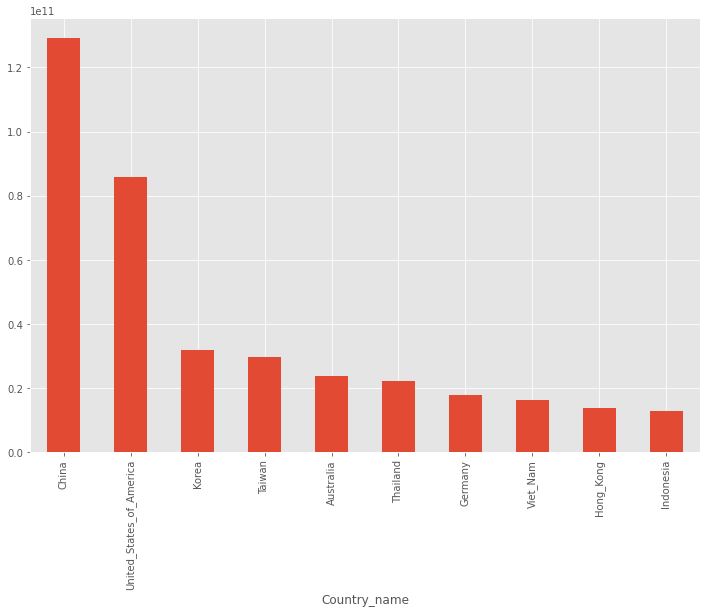

In [ ]:
main_df.groupby('Country_name')['Value'].sum().sort_values(ascending = False)[:10].sort_values(ascending = False)[:10].plot(kind = 'bar')

### TOP 10 Products in terms of values

In [ ]:
hs2 = pd.read_csv('hs2_eng.csv')

In [ ]:
hs2.head(3)

,hs2,hs2_name
0,1.0,Live animals.
1,2.0,Meat and edible meat offal.
2,3.0,Fish and crustaceans molluscs and other aquat...


In [ ]:
ym_hs2 = pd.merge(main_df,hs2,on = ['hs2'])

In [ ]:
ym_hs2.head()

,Country,Country_name,Area,index,exp_imp,Year,month,ym,hs2,hs4,hs6,hs9,Q1,Q2,Value,Unit1,Unit2,hs2_name
0,103,Korea,Asia,289.0,1,2020,01,202001.0,3.0,301,30199,30199100,0,187000,129644,NaN,NaN,Fish and crustaceans molluscs and other aquat...
1,103,Korea,Asia,290.0,1,2020,01,202001.0,3.0,301,30199,30199900,0,482183,423962,NaN,NaN,Fish and crustaceans molluscs and other aquat...
2,103,Korea,Asia,343.0,1,2020,01,202001.0,3.0,302,30251,30251000,0,20944,5621,NaN,NaN,Fish and crustaceans molluscs and other aquat...
3,103,Korea,Asia,344.0,1,2020,01,202001.0,3.0,302,30255,30255000,0,228056,81725,NaN,NaN,Fish and crustaceans molluscs and other aquat...
4,103,Korea,Asia,346.0,1,2020,01,202001.0,3.0,302,30282,30282000,0,135995,96507,NaN,NaN,Fish and crustaceans molluscs and other aquat...


In [ ]:
main_df.groupby('hs2')['Value'].sum().sort_values(ascending = False)[:10]

hs2
84.0    86285951798
85.0    85564566103
87.0    65997635963
27.0    65295410614
90.0    27947334488
39.0    17501777551
0.0     16442758529
30.0    15001419979
29.0    14417785216
72.0    14052989863
71.0    11254371196
26.0     9365233357
38.0     7755835960
73.0     7297183495
40.0     5984401825
62.0     5873836261
89.0     5672921551
28.0     5626180440
61.0     5485720363
3.0      5218982601
74.0     4714756643
2.0      4688955309
44.0     4490402384
76.0     4306477143
88.0     4259377291
95.0     4015987926
33.0     3956809039
94.0     3896834906
16.0     2967456097
63.0     2683171255
32.0     2620219865
10.0     2618973776
Name: Value, dtype: int64

<AxesSubplot:xlabel='hs2'>

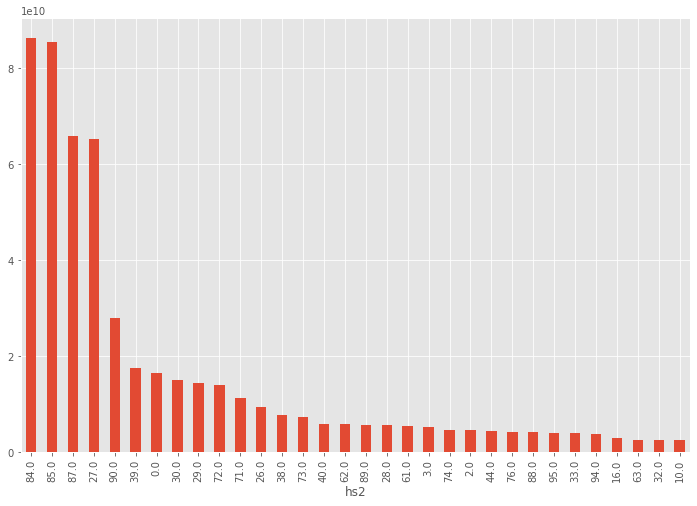

In [ ]:
main_df.groupby('hs2')['Value'].sum().sort_values(ascending = False)[:10].sort_values(ascending = False)[:10].plot(kind = 'bar')

In [ ]:
main_df.groupby('hs4')['Value'].sum().sort_values(ascending = False)[:10]

hs4
8703    41676821146
2709    26775315225
8542    20287979033
2711    18374184874
0       16442758529
8708    15847111943
8486    11987706755
8517    11639360077
2710     9568856283
3004     9379967813
Name: Value, dtype: int64

<AxesSubplot:xlabel='hs4'>

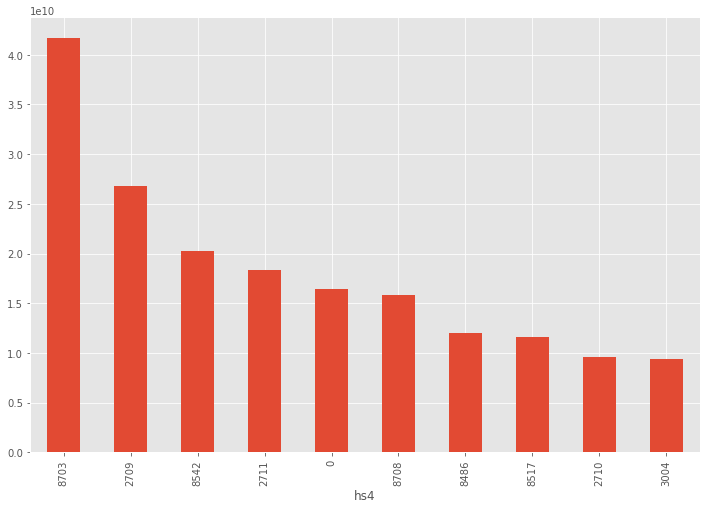

In [ ]:
main_df.groupby('hs4')['Value'].sum().sort_values(ascending = False)[:10].sort_values(ascending = False)[:10].plot(kind = 'bar')

In [ ]:
main_df.groupby('hs6')['Value'].sum().sort_values(ascending = False)[:10]

hs6
270900    26775315225
870323    19706101089
0         16442758529
271111    16183630848
270112     8332796278
854239     8317511337
300490     7922212414
870324     7785031743
870840     7045997098
870340     6691544589
Name: Value, dtype: int64

<AxesSubplot:xlabel='hs6'>

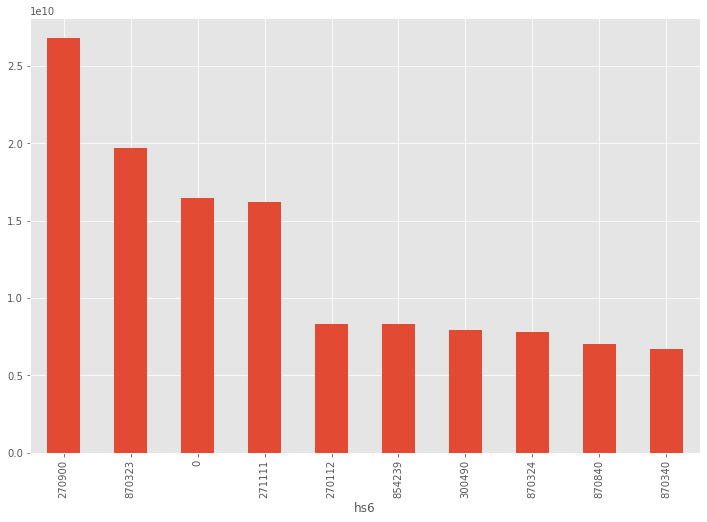

In [ ]:
main_df.groupby('hs6')['Value'].sum().sort_values(ascending = False)[:10].sort_values(ascending = False)[:10].plot(kind = 'bar')

In [ ]:
main_df.groupby('hs9')['Value'].sum().sort_values(ascending = False)[:10]

hs9
270900900    26761565590
271111000    16183630848
190          12697457835
870323919     8764049978
870323929     8519837682
870840000     7045997098
870324920     6857449044
851712000     6491950887
848620000     6274674581
870340900     6197322425
Name: Value, dtype: int64

<AxesSubplot:xlabel='hs9'>

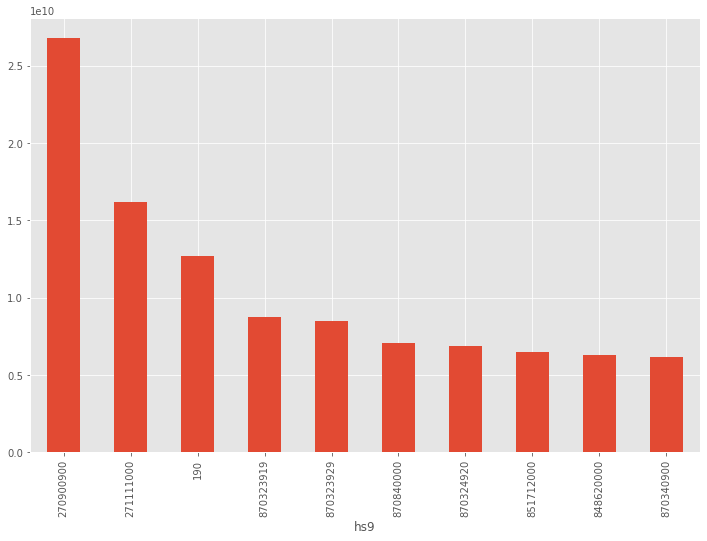

In [ ]:
main_df.groupby('hs9')['Value'].sum().sort_values(ascending = False)[:10].sort_values(ascending = False)[:10].plot(kind = 'bar')

### TOP 10 Countries Japan exports the highest in terms of values

In [ ]:
main_df[main_df['exp_imp']==1].groupby('Country_name')['Value'].sum().sort_values(ascending = False)[:10]

Country_name
China                       57527933957
United_States_of_America    53172642303
Korea                       19790441451
Taiwan                      18339603903
Hong_Kong                   13386366122
Thailand                    11823999688
Singapore                    8075195314
Germany                      7898177567
Viet_Nam                     6897420893
Australia                    5851493640
Name: Value, dtype: int64

<AxesSubplot:xlabel='Country_name'>

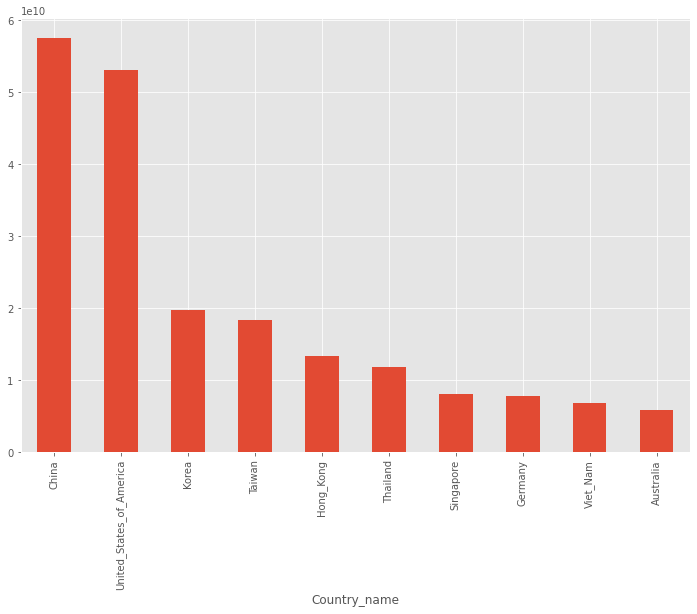

In [ ]:
main_df[main_df['exp_imp']==1].groupby('Country_name')['Value'].sum().sort_values(ascending = False)[:10].plot(kind = 'bar')

### TOP 10 Countries Japan imports the highest in terms of values

In [ ]:
main_df[main_df['exp_imp']==2].groupby('Country_name')['Value'].sum().sort_values(ascending = False)[:10]

Country_name
China                       71548689606
United_States_of_America    32797756128
Australia                   17887794904
Korea                       12270164407
Taiwan                      11329098069
Saudi_Arabia                10741627012
Thailand                    10383192476
Germany                     10145193275
United_Arab_Emirates         9663945086
Viet_Nam                     9360414965
Name: Value, dtype: int64

<AxesSubplot:xlabel='Country_name'>

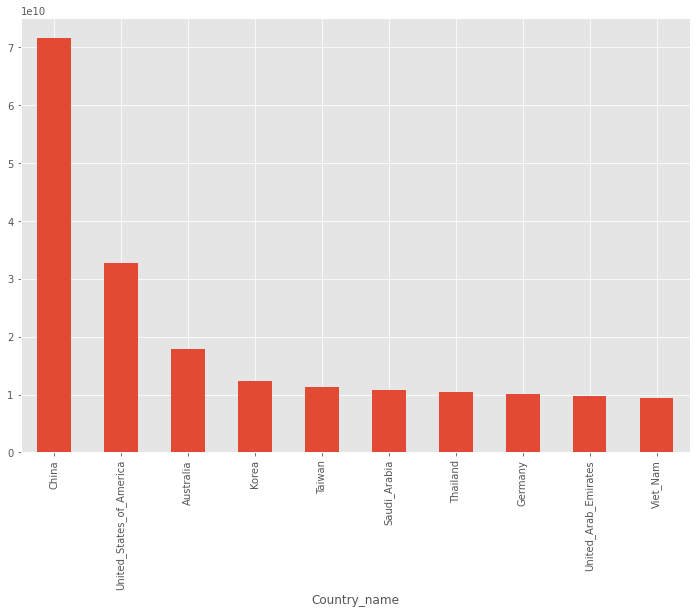

In [ ]:
main_df[main_df['exp_imp']==2].groupby('Country_name')['Value'].sum().sort_values(ascending = False)[:10].plot(kind = 'bar')

### Top 10 hs2 product being exported to Asian countries

In [ ]:
ym_hs2_asia = ym_hs2[(ym_hs2['Area']=='Asia') & (ym_hs2['exp_imp'] ==1)]
hs2_asia_count = ym_hs2_asia['hs2_name'].value_counts()[:10]

<AxesSubplot:>

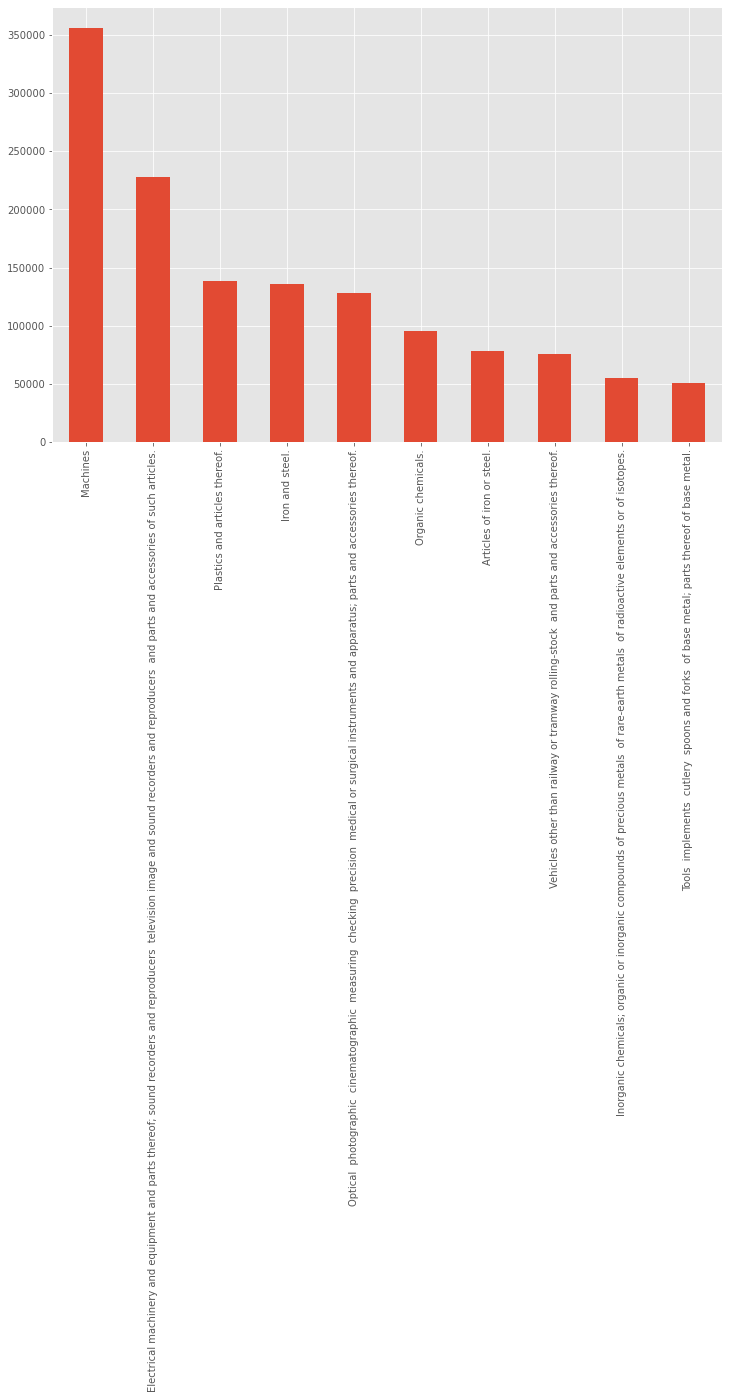

In [ ]:
hs2_asia_count.plot(kind='bar')

In [ ]:
hs2_asia_count = ym_hs2_asia['hs2_name'].value_counts()[:10]

<AxesSubplot:>

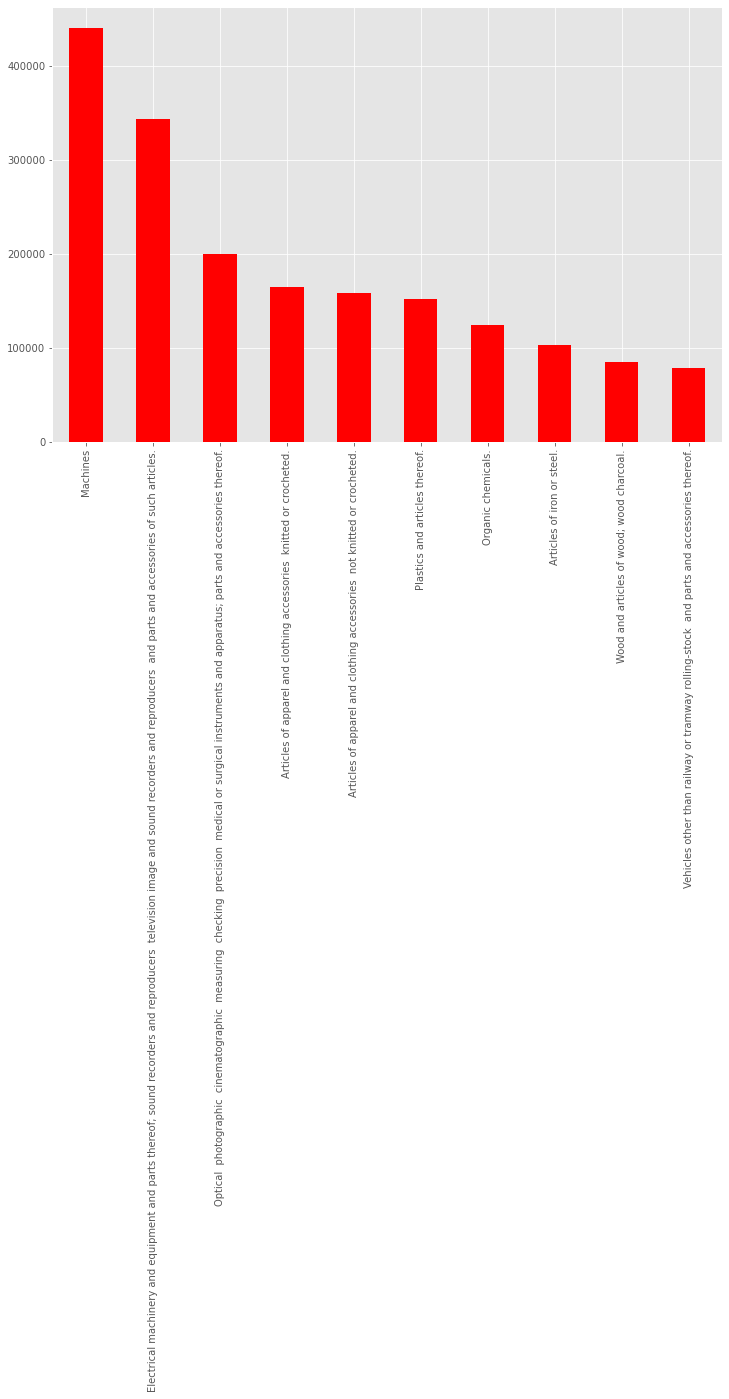

In [ ]:
ym_hs2[ym_hs2['exp_imp'] ==2]['hs2_name'].value_counts()[:10].plot(kind = 'bar',color = 'Red') 


### TOP 10 hs2 imports from all countries)

<AxesSubplot:>

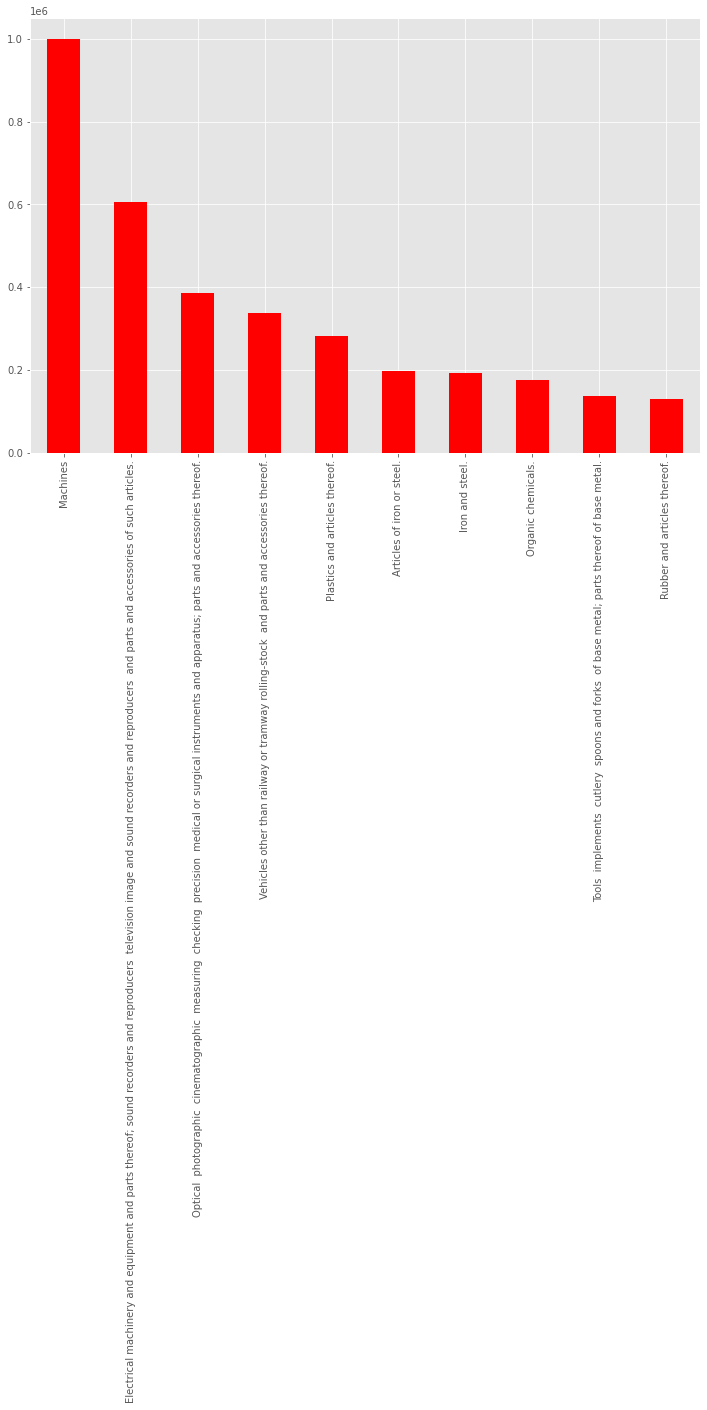

In [ ]:
ym_hs2[ym_hs2['exp_imp'] ==1]['hs2_name'].value_counts()[:10].plot(kind = 'bar',color = 'Red') 

### Top 10 hs4 product being exported to Asian countries

In [ ]:
hs4 = pd.read_csv('hs4_eng.csv')

In [ ]:
hs4.head(2)

,hs4,hs4_name
0,0,unknow
1,101,Live_horses__asses__mules_and_hinnies


In [ ]:
ym_hs4 = pd.merge(main_df,hs4,on = ['hs4'])

In [ ]:
ym_hs4_asia = ym_hs4[(ym_hs2['Area']=='Asia') & (ym_hs4['exp_imp'] ==1)]

In [ ]:
hs4_asia_count = ym_hs4_asia['hs4_name'].value_counts()[:10]

<AxesSubplot:>

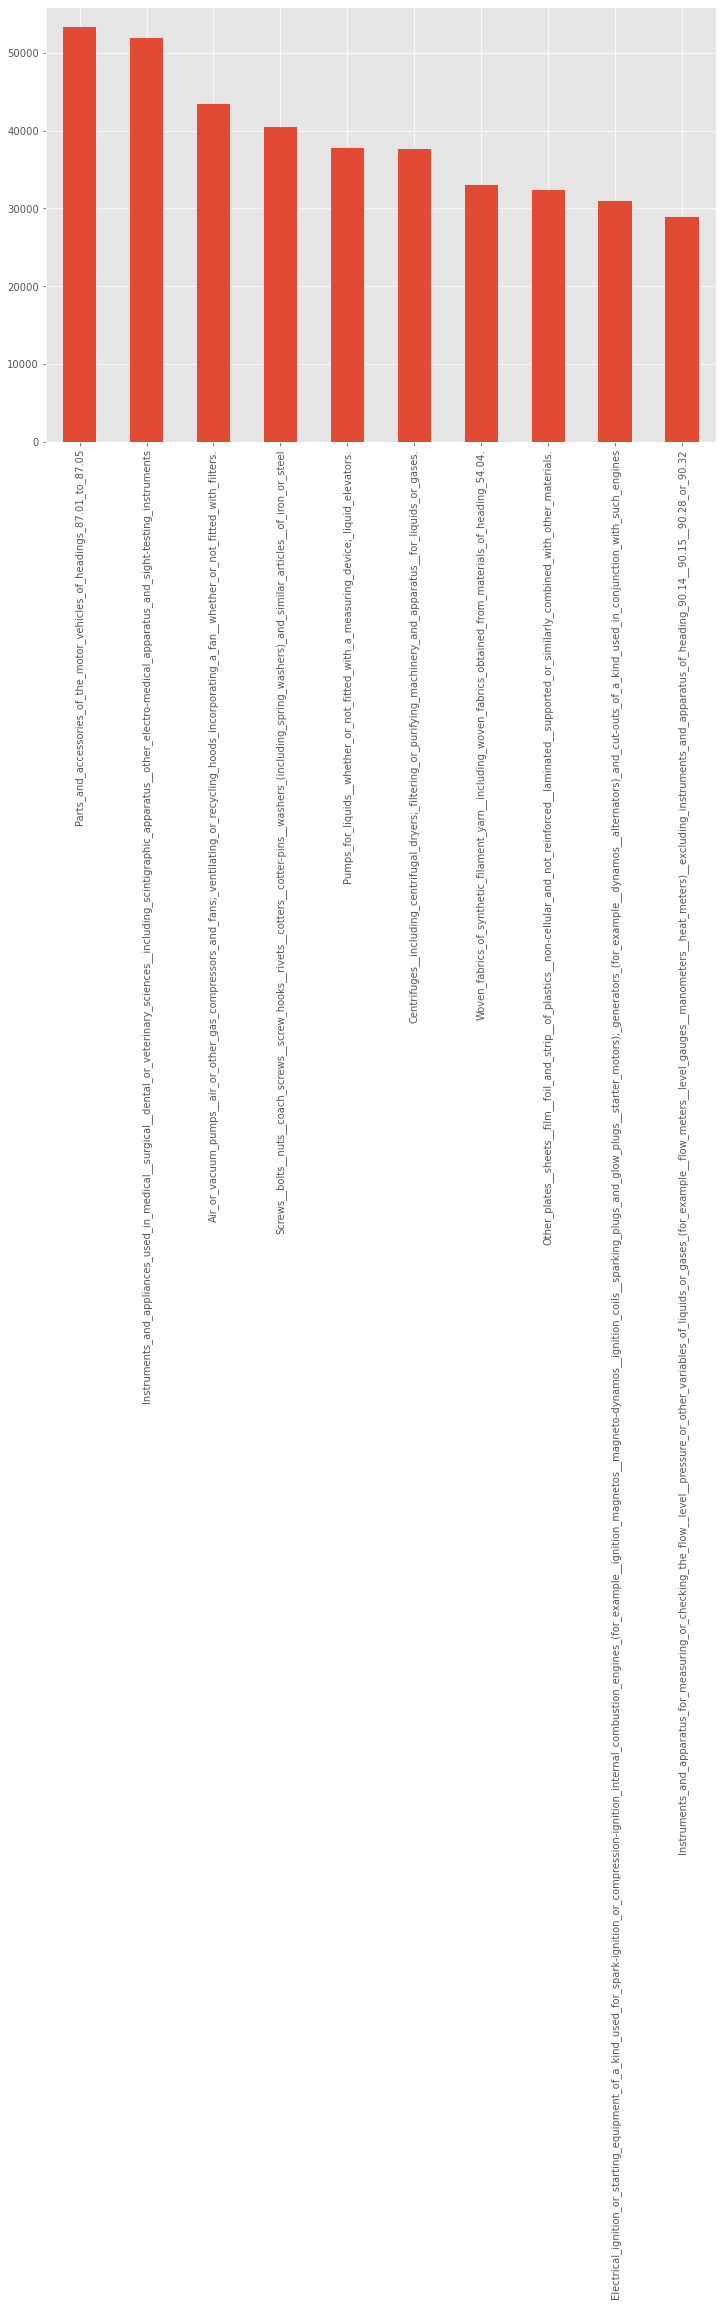

In [ ]:
hs4_asia_count.plot(kind='bar')

### Top 10 hs6 product being exported to Asian countries

In [ ]:
hs6 = pd.read_csv('hs6_eng.csv')

In [ ]:
ym_hs6 = pd.merge(main_df,hs6,on = ['hs6'])

In [ ]:
ym_hs6_asia = ym_hs6[(ym_hs6['Area']=='Asia') & (ym_hs6['exp_imp'] ==1)]

In [ ]:
hs6_asia_count = ym_hs6_asia['hs6_name'].value_counts()[:10]

<AxesSubplot:>

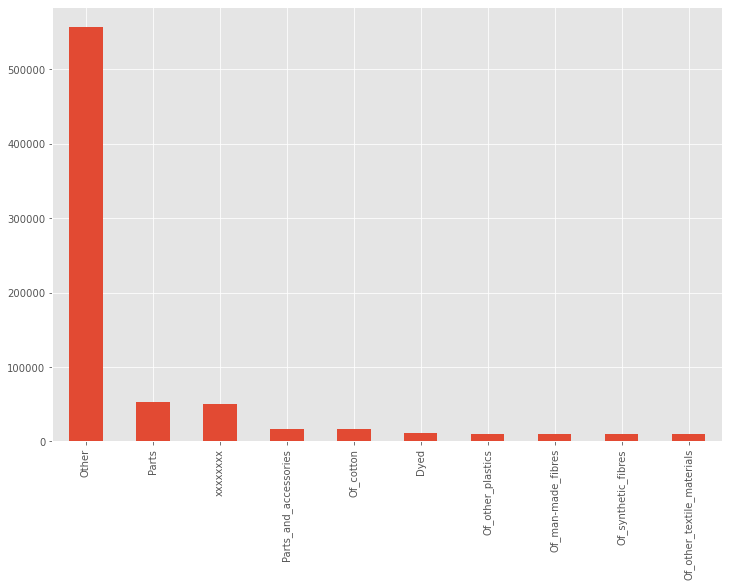

In [ ]:
hs6_asia_count.plot(kind = 'bar')

### Top 10 hs9 product being exported to Asian countries

In [ ]:
hs9 = pd.read_csv('hs9_eng.csv')

In [ ]:
ym_hs9 = pd.merge(main_df,hs9,on = ['hs9'])

In [ ]:
ym_hs9_asia = ym_hs9[(ym_hs9['Area']=='Asia') & (ym_hs9['exp_imp'] ==1)]

In [ ]:
hs9_asia_count = ym_hs9_asia['hs9_name'].value_counts()[:10]

<AxesSubplot:>

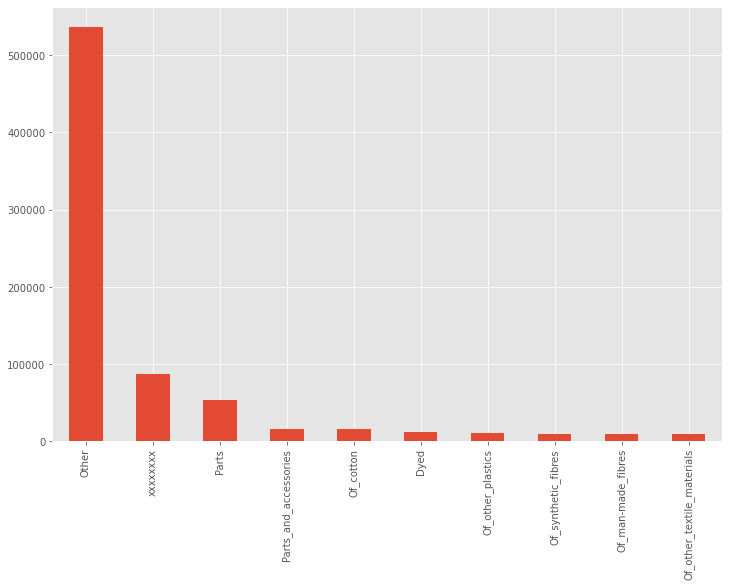

In [ ]:
hs9_asia_count.plot(kind = 'bar')

### Chart of Q1 sum(exports) over countries

In [ ]:
q1_exp = main_df[main_df['exp_imp']==1].groupby('Country_name')['Q1'].sum().sort_values(ascending=True)

<AxesSubplot:xlabel='Country_name'>

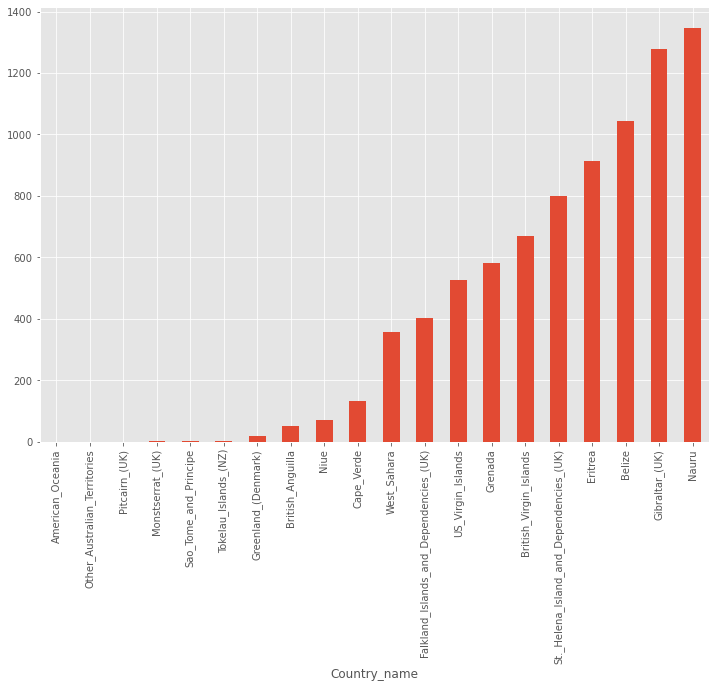

In [ ]:
q1_exp[:20].plot(kind='bar')

### Chart of Q1 sum(imports) over countries

In [ ]:
q1_imp = main_df[main_df['exp_imp']==2].groupby('Country_name')['Q1'].sum().sort_values(ascending=False)

<AxesSubplot:xlabel='Country_name'>

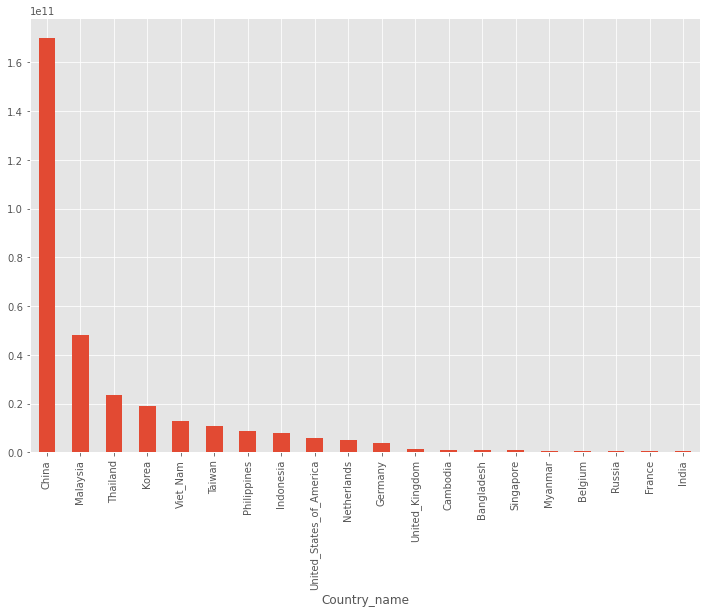

In [ ]:
#bar plot - Q1 sum(exports) over countries
q1_imp[:20].plot(kind = 'bar')

### Chart of Q2 sum(exports) over countries

In [ ]:
q2_exp = main_df[main_df['exp_imp']==1].groupby('Country_name')['Q2'].sum().sort_values(ascending=True)

<AxesSubplot:xlabel='Country_name'>

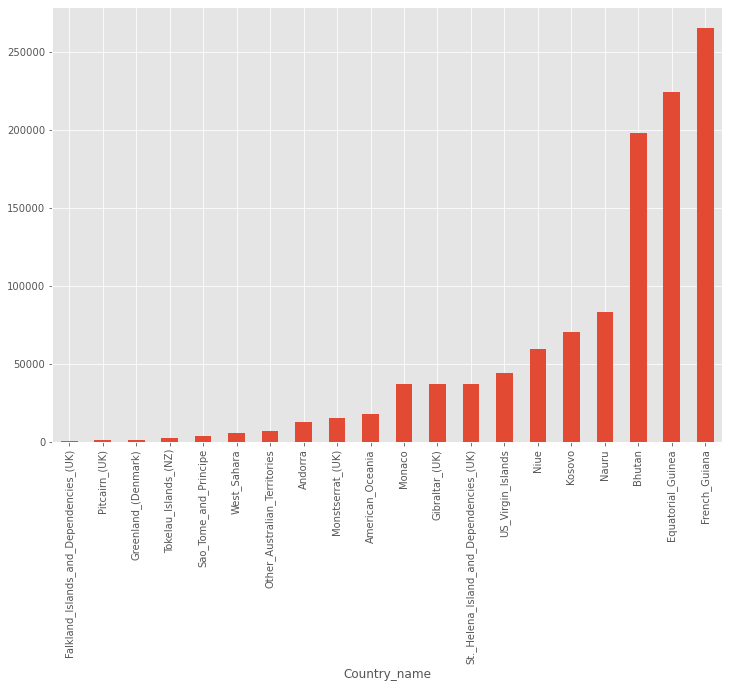

In [ ]:
#bar plot - Q2 sum(exports) over countries
q2_exp[:20].plot(kind = 'bar')

### Chart of Q2 sum(imports) over countries

In [ ]:
q2_imp = main_df[main_df['exp_imp']==2].groupby('Country_name')['Q2'].sum().sort_values(ascending=False)

<AxesSubplot:xlabel='Country_name'>

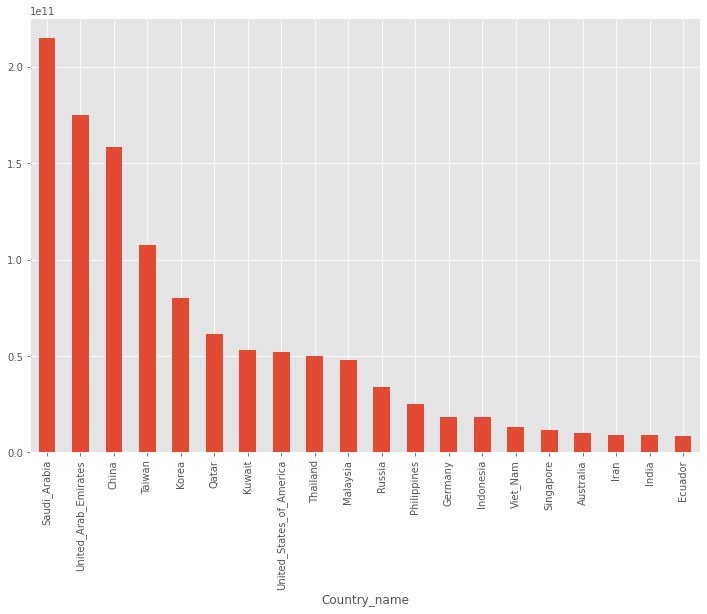

In [ ]:
#bar plot - Q2 sum(imports) over countries
q2_imp[:20].plot(kind = 'bar')

### Line plot of value over time (year)

<AxesSubplot:xlabel='Year'>

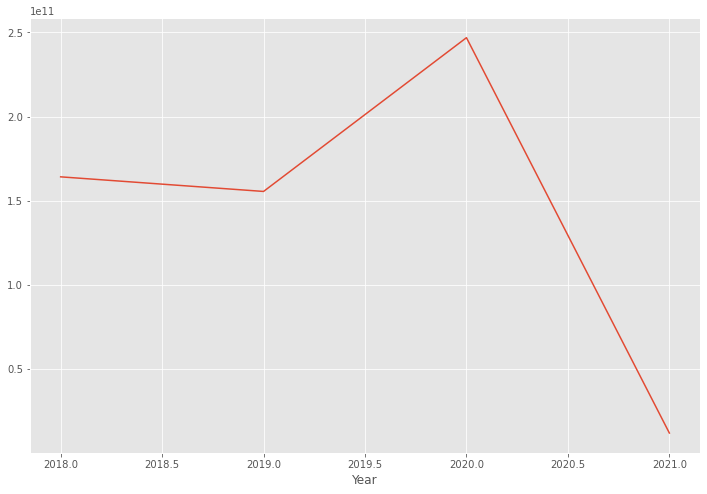

In [ ]:
main_df.groupby('Year')['Value'].sum().plot.line('Year','Value')

# Building a Linear Model

In [ ]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

<AxesSubplot:>

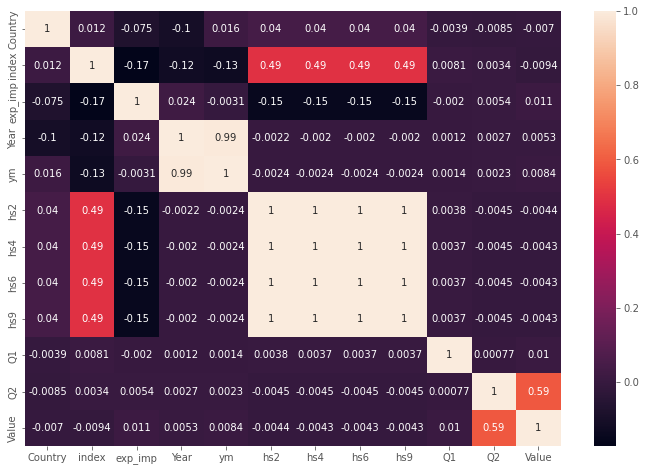

In [ ]:
sns.heatmap(main_df.corr(),annot=True)

In [ ]:
# As is visible from the pairplot and the heatmap, the variable Q2 seems to be most correlated with Values,
# So let's go ahead and perform simple linear regression using Q2 as our feature variable.

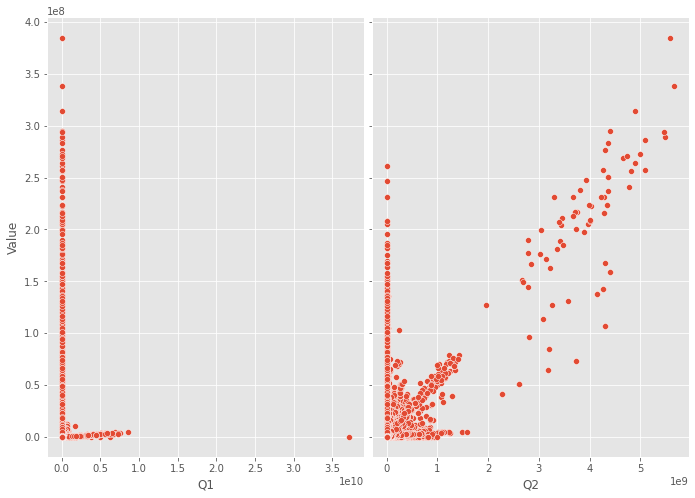

In [ ]:
#Checking relationship between features and response
sns.pairplot(main_df,x_vars=['Q1','Q2'],y_vars='Value',height=7,aspect=0.7)

In [ ]:
#drop columns
main_df.drop(columns=['Country','Country_name','Area','index','exp_imp','ym','hs2','hs4','hs6','hs9','Unit1','Unit2'],inplace=True)
main_df

,Year,month,Q1,Q2,Value
3,2020,01,0,187000,129644
4,2020,01,0,482183,423962
5,2020,01,0,20944,5621
6,2020,01,0,228056,81725
7,2020,01,0,135995,96507
...,...,...,...,...,...
9336721,2020,07,2,7880,572
9336722,2020,02,0,192813,13498
9336723,2021,01,0,133,522
9336724,2021,01,5,4160,657


In [ ]:
#normalise our data set to a common scale using min max scaler
scaler=MinMaxScaler()
normalised_df=pd.DataFrame(scaler.fit_transform(main_df),columns=main_df.columns)
features_df=np.array(normalised_df.Q2).reshape(-1,1)
target_df=normalised_df['Value']
#now we split our dataset into the training and testing dataset
x_train,x_test,y_train,y_test=train_test_split(features_df,target_df,test_size=0.3,random_state=1)
linear_model=LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train,y_train)
#obtain predictions
predicted_values=linear_model.predict(x_test)
r2_score=r2_score(y_test,predicted_values)
round(r2_score,3)

0.364

In [ ]:
mae=mean_absolute_error(y_test,predicted_values)
round(mae,2)

0.0